<a href="https://colab.research.google.com/github/SerbC/2026S1/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1) Import data - DONE
# 2) Shuffle the data - DONE
# 3) Train test split - DONE
# 4) Preprocess the data:
#     a) normalizare
#     b) resize - DONE-ish
#     c) augumentare
#     d) remove/accout4 autliers - Not 4 us
#     e) dataset balancing - Not 4 us
# 5) Feature extraction
# 6) Classifier
# PR, Confusion Matrix, etc

0. Import Libs

In [1]:
import cv2
import numpy as np
import glob
import random
import matplotlib.pyplot as plt

1. Import data (PART 1)

In [3]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
bp = "/content/drive/MyDrive/fac/Laborator/Images/"
file_path_arr = []
for i in range(4):
  file_path_arr.append(glob.glob(bp+str(i)+'/*.jpg'))
print(file_path_arr)
print(len(file_path_arr))

[['/content/drive/MyDrive/fac/Laborator/Images/0/0.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/1.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/2.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/3.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/4.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/5.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/6.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/7.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/8.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/9.jpg'], ['/content/drive/MyDrive/fac/Laborator/Images/1/0.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/1.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/2.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/3.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/4.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/5.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/6.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/7.jpg', '/cont

2) Shuffle the data

In [62]:
random.seed(42)

In [63]:
image_index_arr = random.sample(range(0, 9), 7)
print(image_index_arr)

[1, 0, 5, 2, 8, 4, 7]


In [65]:
train_img_path = []
test_img_path = []

for habd_class in file_path_arr:
  tmp_train = []
  tmp_test = []
  for i in range(10):
    if i not in image_index_arr:
      tmp_test.append(habd_class[i])
    else:
      tmp_train.append(habd_class[i])
  train_img_path.append(tmp_train)
  test_img_path.append(tmp_test)

print(np.shape(train_img_path))
print(np.shape(test_img_path))

(4, 7)
(4, 3)


1. Import data (Part 2)

In [66]:
train_images = []
test_images = []

for cls in train_img_path:
  t = []
  for i in cls:
    t.append(cv2.imread(i))
  train_images.append(t)

for cls in test_img_path:
  t = []
  for i in cls:
    t.append(cv2.imread(i))
  test_images.append(t)

print(np.shape(train_images))
print(np.shape(test_images))

(4, 7, 4032, 1908, 3)
(4, 3, 4032, 1908, 3)


(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7ca2c5d53410>)

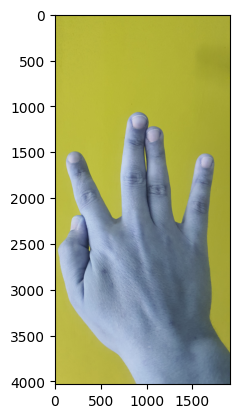

In [67]:
plt.figure(), plt.imshow(train_images[0][0])

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7ca2c62fd210>)

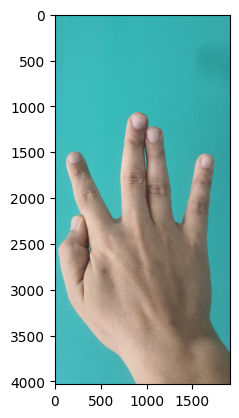

In [68]:
im = train_images[0][0]
img_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.figure(), plt.imshow(img_rgb)

4. Preprocess the data

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7ca2c5c39010>)

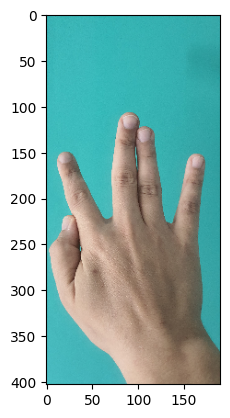

In [69]:
w, h, _ = np.shape(img_rgb)
scale_dw = 10
img_resized = cv2.resize(img_rgb, (int(h/scale_dw),int(w/scale_dw)))
plt.figure(), plt.imshow(img_resized)